In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144

# Hypothesis Testing
<!-- requirement: images/Kolmorogov-Smirnov.png -->

## False positives versus false negatives

Hypothesis testing is all about our ability to discriminate between random noise and true signal in data.

|                   |       Truth Positive     |      Truth Negative     |
|-------------------|:------------------------:|:-----------------------:|
| **Test Positive** |     True Positive        | False Positive (Type I) |
| **Test Negative** | False Negative (Type II) |     True Negative       |

Obviously we care about both, but most of what you learned in statistics is about False Positive error (Type I).

## Z-Score

When we are trying to get a mean estimate of a bunch of numbers $x_1,\ldots,x_n$.  Let's say we know the **standard deviation** is $\sigma$.  What is the confidence interval around the mean $\overline x$?  **We expect $\overline x$ to be normally distributed around the true mean with standard deviation $\frac{\sigma}{\sqrt{n}}$.**  This last quantity is the **standard error** and is often denoted $s$.  The **$z$-score** measures *how many standard errors a result is from some hypothesis.*  If it is sufficiently far away from 0, the null hypothesis is assumed to be false. (For a statistician, you reject the null hypothesis or you fail to reject the null hypothesis.)

As a straightforward approximation, the **confidence interval** of a statistic $\overline x$ is just the interval centered around $\overline x$,
$$[\overline x - z s, \overline x + zs]$$
The $z$-score $z$ is related to the confidence of the error via the **cumulative normal distribution** either using **one-sided** or **two-sided** $p$-values.  **A $p$-value is just the probability of obtaining a result equal to or more extreme than what was actually observed.**  For example, if we observed $\hat x$ and our null hypothesis is $x_0$, then $p = N(- |\hat x - x_0|)$ for a two sided test (and without the absolute value for a one-sided test).  You can learn more via the Wikipedia articles on [Confidence Intervals](https://en.wikipedia.org/wiki/Confidence_interval) and [$p$-values](https://en.wikipedia.org/wiki/P-value), but they are pretty straightforward and you probably already know them.

**Question:** 
1. Under the null hypothesis, what is the distribution of the $p$-value? **$p$-value follows Uniform distribution [0,1]**
1. What is the difference between the standard error and the standard deviation?  They both measure the *uncertainty* around a measured quantity.  When do you use one versus the other?
1. Why do we expect the distribution of the mean to be normal?  Can you name a theorem in probability that might suggest this? **Central limit theorem**
1. How do you find the 95% confidence interval for a quantity?  $\bar{x} \pm z\sigma/\sqrt{n}$ where $z=1.96$ for 95% confidence interval. How are $p$-values and confidence intervals related? **p-value < 0.05 **
1. When would you use a one-tailed vs. two-tailed test?

## CDF and the Uniform Distribution

Applying the cumulative distribution function for a distribution to data drawn from that distribution yields a uniform distribution. ** Let $X$ be a random variable and $F_X$ be the CDF of the distribution of $X$.  Then $F_X(X)$ is uniformly distributed. ** The converse of this statement is that if $U$ is uniformly distributed, $F_X^{-1}(U)$ will be distributed as $X$.

**Exercise:**

1. Use `scipy.stats.norm.rvs` to generate random normally distributed samples and apply the CDF `scipy.stats.norm.cdf`.  Plot the distribution to convince yourself $F_X(X)$ is uniform and $F_X^{-1}(U)$ is distributed as $X$.

## T-Test

The above scenario is idealistic.  In reality we usually don't know the standard deviation $\sigma$ and have to estimate it.  But since our estimate of $\sigma$ is itself noisy, the test statistic for $x$ is no longer normal.  It follows what is called a **Student T** distribution.  The Student T distribution looks a lot like a Standard Gaussian (a Gaussian with 0 mean and 1 standard deviation) but **has wider tails** and the same concepts of $p$-values and confidence intervals apply but their numerical values are slightly different.  The **Student T** is parameterized by $\nu$ and approaches a standard Gaussian as $\nu \to \infty$.  For this reason, people usually use $Z$-Score rather than $T$-Tests.

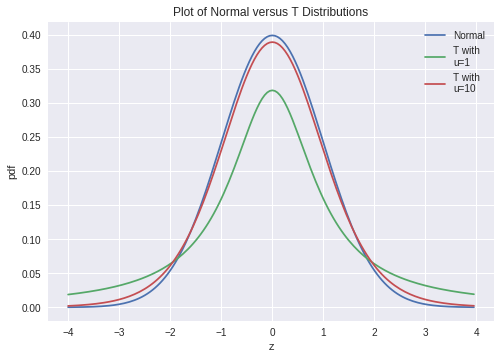

In [2]:
# Below we plot the normal and student t distributions

import numpy as np
import matplotlib.pylab as plt
from scipy import stats

z = np.arange(-4,4,.05)
plt.plot(z, stats.norm.pdf(z), label="Normal")
plt.plot(z, stats.t.pdf(z, 1), label="T with \nu=1")
plt.plot(z, stats.t.pdf(z, 10), label="T with \nu=10")
plt.xlabel("z")
plt.ylabel("pdf")
plt.title("Plot of Normal versus T Distributions")
plt.legend()
plt.show()

In [3]:
np.random.seed(42)
samples = np.random.randn(20)

print "P-Statistic for true mean", stats.ttest_1samp(samples, 0.)[1]
print "P-Statistic for wrong mean", stats.ttest_1samp(samples, .5)[1]

P-Statistic for true mean 0.434750588427
P-Statistic for wrong mean 0.00554886566702


## Standard Error for a rate

One big *gotcha* with hypothesis testing is when the quantity is a rate.  Suppose we observe on average a rate of $p$ for a population of size $n$.  Then the **standard error** is given by

$$s=\frac{\sigma}{\sqrt{n}}=\sqrt{\frac{p(1-p)}{n}}$$

**Question:** Can you prove this?  Reviewing the [Binomial Distribution](https://en.wikipedia.org/wiki/Binomial_distribution) may help.

In [4]:
# Binomial Distribution Test

np.random.seed(42)
trials = 200
successes = np.random.binomial(trials, .4)
print "P-Statistic for true rate", stats.binom_test(successes, trials, p=.4)
print "P-Statistic for wrong rate", stats.binom_test(successes, trials, p=.3)

P-Statistic for true rate 0.718321451455
P-Statistic for wrong rate 0.0107130592889


## Standard Error for a counting process

If we have a counting process, if the mean count is given by $\hat \lambda$, then the standard error is
$$s=\sqrt{\frac{\hat \lambda}{n}}$$

**Question:**
1. Can you prove why this is true?  Reviewing the [Poisson Distribution](https://en.wikipedia.org/wiki/Poisson_distribution) may help.
1. In practice, you probably don't want to use this statistic unless you have to.  Can you explain why?  The assumptions about the Poisson process may help.  (Poisson processes assume that the underlying visits are memoryless, i.e. exponentially distributed.  But a lot of human practices are not memoryless - we eat 3 times a day at regular intervals, we visit a certain website during our lunch hour, etc. - you should probably assume the stats are normally distributed.) 

### Hypothesis testing exercises

**Questions:** Based on the data below, for each of the following give the estimate, standard error, and 95% confidence interval for each statistic:
1. The number of visitors each day
1. The fraction of visitors who clicked on an ad
1. The average length of time spent on the website

For convenience, the data and useful functions are provided below:

In [5]:
from scipy import stats
import pandas as pd

# visitors over 20 days
visitors = np.array([120, 111, 101, 103, 70,  68, 107, 102, 90,  95,  
                  90, 117, 98, 91,  75, 107, 99,  99,  86, 122])

ad_clicks = 185  # over all 20 days

# The average sojourn (in minutes) of 30 randomly sampled individuals
average_stays = np.array([ 2.84799771,  2.1514534 ,  4.25906915,  3.123563  ,  2.13638452,
                        1.11285345,  3.28044905,  2.34594452,  3.22622406,  2.76832574,
                        2.0252873 ,  2.61806822,  3.50201678,  1.71457327,  1.80086151,
                        4.4659228 ,  1.97922848,  2.53321636,  2.56194764,  2.38814788,
                        2.17562729,  3.9998741 ,  3.10232623,  1.00104026,  3.71479376,
                        2.78890102,  2.74488564,  2.54540661,  2.26922199,  1.9585881 ])

# a few useful commands
a = np.arange(10)
print a.mean()  # the mean
print a.std()  # the standard deviation
print stats.norm.cdf(0) # cumulative distribution function
print stats.norm.ppf(.5) # inverse of cdf but in PERCENTAGE POINTS!

4.5
2.87228132327
0.5
0.0


## Power calculations

Power calculations deal with **False Negatives (Type II Error)**.  In particular, they help answer the question: if the effect is of size $x$, how many observations do I need to observe an effect of a certain magnitude at a certain level of significance?  That is, its two inputs are $p$, a desired **significance level**, and $m$, the **magnitude of the effect**.

Unfortunately, scikit does not support power calculations so you'll have to do them manually.  Fortunately, here's a useful pneumonic for remembering how to compute power calculations.

## Pneumonic summary

In a sense, confidence intervals, $p$-values, and power calculations can be boiled down to two equations
$$ |x_0 - \overline x| = m = zs = z \frac{\sigma}{\sqrt{n}} = N^{-1}(1 - p) s$$
For $p$-values and confidence intervals, recall that $\sigma$, $n$, and $\overline x$ are known from the data.  Hence we also have $s$.  The only free variables left are $m$ (alternatively $x_0$) and $p$.

1. To compute a $p$-value, we need $x_0$, which then gives us $p$.
1. To compute a confidence interval, we need $p$ and and then we can compute the range that $x$ can fall into, namely $\overline x \pm zs$.
1. For a power calculation, we know $m$, $p$, and $\sigma$ (from the data) and need to compute $n$.
1. Finally, don't forget that for a $T$ test, $N$ is no longer normal but the Student $T$ distribution.

**Questions:** Given the website visiting rates in the previous exercise:
1. How many days will it take us to know the expected number of arrivals to within $\pm 10$ with $0.05$ level of confidence?
1. How many days will it take us to know the click through rate to within $\pm 0.001$ with $0.05$ level of confidence?
1. How many sample sojourns will we need to collect to know average sojourn time to within $10$ seconds with $0.05$ level of confidence?

## A/B testing

One of the most common applications of Hypothesis Testing is A/B testing.  In its simplest form, you have two options (named A and B) which you are comparing based on some option.  Users who arrive at the website are randomly assigned either group A or group B, usually based on a hash of their candidate ID.  We then compare the outcomes of group A and B based on a predefined metric.

**Questions:**
1. From a product perspective, why do we "shard on user" rather than on arrivals?  That is, why is a user who comes to the website multiple times exposed to the same experiment?
1. What is an A/A test?
    - When you measure the click-through-rate on an ad, why does it often result in statistically significant results?
1. When does an A/B test fail?
1. In the above problem, let us say we have two different ads.  We give one ad $p$ fraction of traffic and another ad $p-1$ fraction of the traffic.  How long before we can distinguish their performance at a 0.05 significance level, assuming that we only care about click-through rates that differ by $\pm 0.005$ at $p=0.5$?  How does the answer change as you vary $p$?  When would you want to use a small $p$?

## Causality versus correlation

We all know that correlation doesn't imply causation.  Sometimes you want to infer one but not the other.

One of the key lessons in Causality is [Simpson's Paradox](https://en.wikipedia.org/wiki/Simpson's_paradox):

1. In 1973, women applying to school at UC Berkeley were (overall) 10 percentage points less likely to be admitted than men.  Is the university discriminating against women?  It turns out that women tended to apply to departments that were harder to get into, but that, per department, women had a higher or equal admissions rate.
1. There is a study comparing the relative effectiveness of Treatments A and B on kidney stones.  Overall, Treatment B had a higher success rate.  However, when you broke things down into small versus large kidney stones, Treatment A was superior in both categories.  What was happening is that Treatment B was more often prescribed to small kidney stones, which are generally easier to cure.
1. At this point, you probably believe that the aggregate data cannot be trusted and you always have to drill down.  This is not always the case.  Babies born to smoking mothers have both a higher mortality rate and lower birth weight.  Example:
>  Normal birth weight infants of smokers have about the same mortality rate as normal birth weight infants of non-smokers, and low birth weight infants of smokers have a much lower mortality rate than low birth weight infants of non-smokers, but infants of smokers overall have a much higher mortality rate than infants of non-smokers. 

**Questions:**
1. What is wrong with this sentence: "The stock market fell 5 points on news that..."?
1. You buy 1000 shares of a stock and the price went up.  Were you a clairvoyant (let's say you do this a lot and you can demonstrate the effect is statistically significant)?  How do you distinguish causation and correlation?
1. At Foursquare, we ran an A/B experiment for venue recommendations.  The B model showed more check-ins at venues that it recommended than the A model.  Was the B model better at driving check-ins?  Answer: there's a different between predicting the future and affecting the future.

> Finally, a really cool idea from social science that actually allows you to infer causality from correlation.  It's called an **Instrumental Variable**.  In the natural sciences, when comparing an independent versus dependent variable, it is easy to infer causation because the experimenter is usually varying the independent variable.  But in the social sciences, these are often the result of a natural experiment so the experimenter has no direct control of the independent variable.  An Instrumental Variable is a third variable which is believed to be exogenous, independent from the dependent variable, except because of its effects on the dependent variable.

> 1. [Using Vietnam-Era draft lottery to measure the effect of education on earnings](http://www.nber.org/papers/w4067)
> 1. [Steven Levitt's explanation on prison overcrowding to understand the effect of prison size on crime rates](http://qje.oxfordjournals.org/content/111/2/319.short)

> For more information, check out the [Wikipedia article on Instrumental Variables](https://en.wikipedia.org/wiki/Instrumental_variable).

## Distributional tests

Notice that up until this point, we have been looking at specific statistics (usually a mean) and testing if a proposed value is reasonable.  Given a set of data points $X_1, \ldots, X_n$, how do you test if it is normally distributed?

The answer is the [Komolgorov-Smirnov Test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test).  The basic idea is that if you sort your data in increasing order, it should have a certain distribution if it is to look approximately normal.  Mathematically, you want to compute the empirical cumulative distribution (which gives what fraction of the points are less than $x$)
$$F_n(x) = \frac{1}{n}\sum_{i=1}^n I_{X_i \le x}$$
and compare it with the known cumulative distribution for a normal distribution $N$.  Kolmogorov showed that
$$D_n = \sup_x |F_n(x) - N(x)|$$
under the null-hypothesis is distributed as the maximum of a Brownian Bridge (which is named the Kolmogorov Distribution) and has a known distribution.  Below is a plot of $D_n$:

![Kolmogorov Smirnov Test from Wikipedia](images/Kolmorogov-Smirnov.png)

**Question:** How would you test if the data is distributed as if it were Cauchy or exponential?

It turns out that `scipy` function to perform a Kolmogorov-Smirnov test `kstest` ([documentation](http://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.kstest.html)) takes a parameter which is the CDF of the distribution you want to test.  There's also a function `ks_2samp` ([documentation](http://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.ks_2samp.html)) for comparing two datasets and testing if they're drawn from the same distribution.

In [6]:
np.random.seed(42)
normal_data = stats.norm.rvs(size=1000)
exponential_data = stats.expon.rvs(size=1000)

print "P-value for normal data", stats.kstest(normal_data, stats.norm.cdf)[1]
print "P-value for exponential data", stats.kstest(exponential_data, stats.norm.cdf)[1]

normal_data2 = stats.norm.rvs(size=1000)
exponential_data2 = stats.expon.rvs(size=1000)
print "P-value for two normal datasets", stats.ks_2samp(normal_data, normal_data2)[1]
print "P-value for two exponential datasets", stats.ks_2samp(exponential_data, exponential_data2)[1]
print "P-value for a normal and an exponential dataset", stats.ks_2samp(normal_data, exponential_data)[1]

P-value for normal data 0.924858030476
P-value for exponential data 0.0
P-value for two normal datasets 0.822841332825
P-value for two exponential datasets 0.0839055536071
P-value for a normal and an exponential dataset 7.22109041986e-106


## Multiple tests

It's often the case that we have multiple hypotheses $H_1, \ldots, H_m$ that we are trying to test.  In this case, if we test each hypothesis to significance $\alpha$ (i.e. we reject if $p_i \le \alpha$), then the probability of a false positive for *any* of these will be greater than $\alpha$.  The [Bonferroni Correction](https://en.wikipedia.org/wiki/Bonferroni_correction) tells us that if you want the probability of a false positive across *any* hypothesis to be less than $\alpha$, you need to test each one at significance $\alpha / m$.  The proof is based on Boole's inequality:

$$ \Pr\left[\bigcup_{k=1}^m \left\{ p_i \le \frac{\alpha}{m}\right\} \right] \le \sum_{k=1}^m \Pr \left(p_i \le \frac{\alpha}{m} \right) \le m \frac{\alpha}{m} = \alpha $$

**Question:** Based on the proof, does this require independence or not?

There's also [Dunnett's test](https://en.wikipedia.org/wiki/Dunnett%27s_test), which is slightly more powerful but makes more assumptions.  [TODO: add more about Dunnett and Tukey tests.]

## How trustworthy is your data?
Finally, just always be careful about whether or not you can trust the data.  John Ioannidis has a great paper on why [most scientifically published research results are wrong](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC1182327/).

### Exit Tickets

1. What is wrong with this statement: Over the last 100 years, the NYSE returned 8%.
1. You look at the return of S&P 500 stocks in the last decade and you find it it was 12%.  Why doesn't your mutual fund perform there?
1. If you test for a rare disease that is 99% sensitive (true positive over positives) and 1% chance of a false positive given you don't have the disease, what is the chance of someone testing positive having the disease?
1. According to the [Susan G. Komen Foundation](http://ww5.komen.org/BreastCancer/AccuracyofMammograms.html), mammograms are fairly "sensitive" (78% of positive cases are correctly identified) but have a pretty high false positive rate (50% chance of a false positive).  About [12% of women will get breast cancer at some point in their lifetime](http://www.cancer.org/cancer/breastcancer/detailedguide/breast-cancer-key-statistics).  What is the chance that a randomly selected woman who gets a positive diagnosis has breast cancer?
1. What is wrong with this statement: "Critics are asking why the suspect, who has a previous history of mental illness, was not stopped before he assaulted the couple."
1. What is wrong with this statement: "At an early age Dov Charney [American Apparel's founder and CEO] showed signs of an entrepreneurial and independent spirit" [from Dov Charney's Wikipedia article](http://en.wikipedia.org/wiki/Dov_Charney).

### Spoilers

### Answers

### Z-Score
1. Uniform on $[0, 1]$
1. Standard Error is for hypothesis testing and varies as $1/\sqrt{n}$, standard deviation is just a measure of a (presumably fixed) distribution and doesn't change with $n$.
1. This is suggested by the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem).
1. Look up the $z$ value corresponding to a 95% confidence interval (use the inverse cumulative normal).  Think carefully about whether this is a two-sided or one-sided test!

### Standard Error for a Counting Process
1. This is just the standard deviation of the Poisson Counting Process divided by $\sqrt{n}$.
1. Poisson processes assume independent arrivals.  Poisson processes assume that the underlying visits are memoryless, i.e. exponentially distributed.  But a lot of human practices are not memoryless - we eat 3 times a day at regular intervals, we visit a certain website during our lunch hour, etc. - you should probably assume the stats are normally distributed.

### A/B Testing
1. Consistency of experience for the user.  A lot of tests are things like "should the background be red or green?" and if the background constantly changes colors, it's very confusing for the user.
1. When you measure the click-through-rate on an ad
1. Two main answers:
    - When there's interaction between groups or network effects.  Imagine a world in which there's no email.  If you release an email product to a small randomly sampled subset of the population, people probably won't find it useful because none of their friends are on it and you'll conclude it was a failure.  This is a big problem for social media companies.  How do you solve for this problem? 
    - Similarly, when you have a two-sided marketplace, the dynamics are very different once you have a critical density of inventory because buyers *know* they can always buy stuff on demand.
1. The further $p$ is from $0.5$, the less data you "effectively" have and the less powerful the experiment.

### Causality versus Correlation
1. Actual attribution that the news story was the reason for the dip in prices is pretty hard.
1. Buying stocks pushes their price up -- due to supply and demand.  It's hard to distinguish correlation from causation (in this case, you want correlation -- not causation).  How do you distinguish causation and correlation in this case?  You have to trade randomly.
1. There's a different between predicting the future and affecting the future.  In the Foursquare case, we want causation but we might actually have correlation.

### Distributional Tests
1. Any distribution can be mapped to any other distribution via its quantile function $q_X: [0,1] \to \mathbb{R}$, which is the inverse of its CDF $F_X: \mathbb{R} \to [0,1]$.  In particular, for $X$ and $Y$ random variables, $F_X(X)$ has a uniform distribution and $q_Y(F_X(X))$ is distributed as $Y$.  We can apply such a function to Cauchy data to transform it to be normally distributed and leverage the Komolgorov-Smirnov Test.  In reality, `scipy.stats.kstest` takes the CDF of the target distribution as an argument ([see the Scipy documentation](http://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.kstest.html)).

### Multiple Tests
1. The proof does not require independence

### Overall Questions
1. Two answers (at least):
    - Selection bias: What about the Buenos Aires stock market since 1920?  These statistics are often quoted about the most successful economy in world history.
    - Change of regimes: The underlying economic drivers are almost certainly different between the Guilded Age and today.  Why should we expect that they lead to the same levels of economic growth?
1. There's a subtle question of which year's S&P 500 you used.  There are huge bias issues if you use today's S&P 500 for calculating returns over the last 10 years.
1. Simple Bayesian Statistics: Depends on the population prior.  If 0.01% of the population ever gets the disease, then the odds are ~ 1%.
1. Simple Bayesian Statistics.
1. Ex-post reasoning fallacy: What fraction of people with mental illness commit assault and is this higher or lower than the average population?
    - Lucia de Berk, whose 7 murder convictions based on improbability of being the nurse for 7 mysterious deaths, was eventually overturned.
1. Another example of ex-post facto reasoning.
    

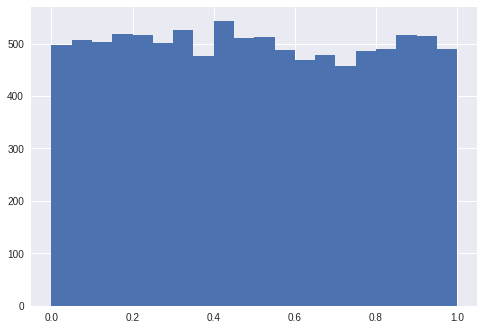

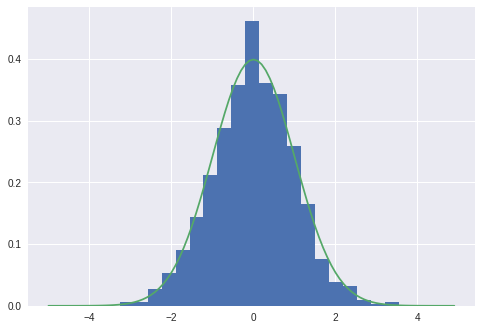

In [7]:
# Useful Fact: Cumulative Distribution Function and Distributions

from scipy import stats
from matplotlib import pyplot as plt
import numpy as np

X=stats.cauchy.rvs(size=10000)
plt.hist(stats.cauchy.cdf(X), bins=20)
plt.show()

U=stats.uniform.rvs(size=1000)
plt.hist(stats.norm.ppf(U), normed=True, bins=20)
x_grid=np.arange(-5,5,.1)
plt.plot(x_grid, stats.norm.pdf(x_grid))
plt.show()

In [8]:
# Hypothesis Testing Exercises

def summary(x):
    t95 = stats.t.ppf(1. - 0.025, len(x) - 1)
    m = x.mean()
    s = x.std() / np.sqrt(len(x))
    return [m, s, [m - s*t95, m + s*t95]]

def summary_rate(p, n):
    t95 = stats.t.ppf(1. - 0.025, n - 1)
    m = p
    s = np.sqrt(p * (1-p) / n)
    return [m, s, [m - s*t95, m + s*t95]]

pd.DataFrame([
    ["Number of Daily visitors"] + summary(visitors),
    ["Ad Click"] + summary_rate(1. * ad_clicks / visitors.sum(), visitors.sum()),
    ["Average Stay visitors"] + summary(average_stays)
], columns=["Name", "estimate", "stderr", "95% Confidence Interval"])

,Name,estimate,stderr,95% Confidence Interval
0,Number of Daily visitors,97.550000,3.295053,"[90.6533745795, 104.446625421]"
1,Ad Click,0.094823,0.006633,"[0.0818150921317, 0.107831243081]"
2,Average Stay visitors,2.638073,0.148612,"[2.3341267856, 2.9420198704]"


*Copyright &copy; 2015 The Data Incubator.  All rights reserved.*